# Лабораторная работа № 2. Логистическая регрессия

На основе набора данных об измерениях роста и веса решите следующую задачу.

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

Расширьте набор признаков добавив данные об измеренном и сообщенном весе, а также данные об поле человека.

Обратите внимание, что в некоторых строках встречаются пропуски. Это обычная ситуация при работе с реальными данными. Эти пропуски необходиму убрать из таблицы вместе со всей строкой. Это можно сделать с помощью метода [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [108]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


F:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [109]:
ds = pd.read_csv('Davis.csv', index_col=0)
ds.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [110]:
from sklearn.linear_model import LogisticRegression

## Задание

1. Обучите модель логистической регресси на данных, используя в качестве целевой переменной пол (sex), а в качестве признаков рост и вес (height, weight).
2. Нарисуйте точки выборки и разделяющую поверхость.
2. Оцените точность и полноту полученного решения и постройте график ROC кривой
3. Расширьте простарнство признаков квадратичными признаками.
2. Нарисуйте точки выборки и разделяющую поверхость.
2. Оцените точность и полноту полученного решения и постройте график ROC кривой

In [111]:
#Load and filtering dataset
from sklearn.model_selection import train_test_split
dataset = pd.DataFrame(ds.dropna())
dataset

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
195,F,62,164,61.0,161.0
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
199,M,90,181,91.0,178.0


In [112]:
dataset.describe()

,weight,height,repwt,repht
count,181.000000,181.000000,181.000000,181.000000
mean,65.701657,170.756906,65.679558,168.657459
std,13.425492,8.954609,13.834220,9.394668
min,39.000000,148.000000,41.000000,148.000000
25%,56.000000,164.000000,55.000000,161.000000
50%,63.000000,169.000000,63.000000,168.000000
75%,74.000000,178.000000,74.000000,175.000000
max,119.000000,197.000000,124.000000,200.000000


In [113]:
dataset = dataset[dataset.height > 100]
dataset = dataset[dataset.repht > 100]
x = pd.DataFrame(dataset[['weight','height' ]]) 
y= pd.DataFrame(dataset['sex'])
y['sex'] = y['sex'].map( {'F': 0, 'M': 1} ).astype(int)
X_train, X_valid, y_train, y_valid =  train_test_split(dataset, y, test_size = 0.25)
x_train = pd.DataFrame(X_train.drop(['sex', 'repwt', 'repht'], axis = 1))
x_valid = pd.DataFrame(X_valid.drop(['sex', 'repwt', 'repht'], axis = 1))

In [114]:
print(x_train)
print(y_train)

     weight  height
63       71     180
149      70     173
165      56     163
110      59     166
164      59     172
..      ...     ...
44       78     183
71       62     175
161      51     163
197      83     180
107      52     152

[135 rows x 2 columns]
     sex
63     1
149    0
165    1
110    0
164    0
..   ...
44     1
71     0
161    0
197    1
107    0

[135 rows x 1 columns]


<IPython.core.display.Javascript object>


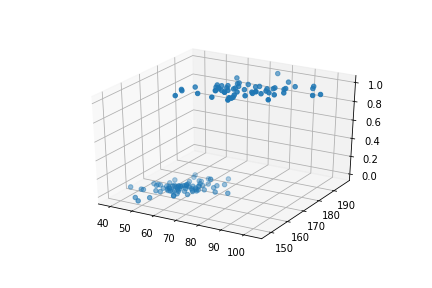

In [115]:
#Our data
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.scatter(x_train['weight'].values, x_train['height'].values, y_train.values)


In [116]:
#Lerning model
clf = LogisticRegression().fit(x_train, y_train)

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
#Get prediction
y_predict = clf.predict(x_valid)

In [118]:
#Get weights of model
dense = clf.densify().coef_[0] 
dense = np.append(dense, clf.intercept_)
print("B0 = ",dense[2],"; B1 = ", dense[0],"; B2 = ", dense[1]) 

B0 =  -55.488651944025484 ; B1 =  0.17060121607767642 ; B2 =  0.25840115461074753


In [119]:
#Find the points of the dividing plane
x = np.arange(min(x_valid['weight'].values), max(x_valid['weight'].values), 0.05)
y = np.arange(min(x_valid['height'].values), max(x_valid['height'].values), 0.05)
x_f = []
y_f = []
z_f = []
eps = 0.01
for x_ in x:
    for y_ in y:
       if((dense[0] * x_ + dense[1] * y_ + dense[2]) < eps) and ((dense[0] * x_ + dense[1] * y_ + dense[2]) > -eps) :
            x_f.append(x_)
            y_f.append(y_)
            z_f.append(0)
            x_f.append(x_)
            y_f.append(y_)
            z_f.append(1)
        

<IPython.core.display.Javascript object>


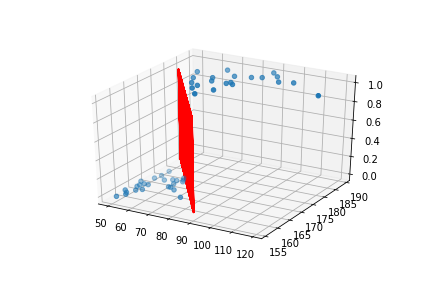

In [120]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_valid['weight'].values, x_valid['height'].values, y_predict)
ax.plot(x_f, y_f, z_f, color = 'red')

In [122]:
#Score
print("SCore: ",clf.score(x_valid, y_valid))

SCore:  0.8913043478260869


<IPython.core.display.Javascript object>


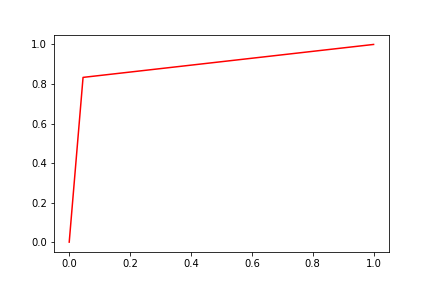

In [123]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_valid, y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

In [124]:
from sklearn.metrics import recall_score
print("Recall: ", recall_score(y_valid.values, y_predict))
from sklearn.metrics import precision_score
print("Precision: ", precision_score(y_valid.values, y_predict))

Recall:  0.8333333333333334
Precision:  0.9523809523809523


# Дополненная модель

In [125]:
X_train = pd.DataFrame(X_train.drop(['sex'], axis = 1))
X_valid = pd.DataFrame(X_valid.drop(['sex'], axis = 1))

In [126]:
#Lerning model
clf_for_more = LogisticRegression().fit(X_train, y_train)

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
print("Score: ", clf_for_more.score(X_valid, y_valid))

Score:  0.8913043478260869


In [128]:
#Get prediction 
y_predict = clf_for_more.predict(X_valid)

In [129]:
#Get weights
dense = clf_for_more.densify().coef_
dense = np.append(dense, clf_for_more.intercept_)
print("B0 = ",dense[4], "; B1 = ",dense[0], ";\nB2 = ",dense[1], "; B3 = ",dense[2], "; B4 = ",dense[3])

B0 =  -57.439507900532725 ; B1 =  -0.3183365439932938 ;
B2 =  0.07393301431743807 ; B3 =  0.5352448707697081 ; B4 =  0.18067303006426896


<IPython.core.display.Javascript object>


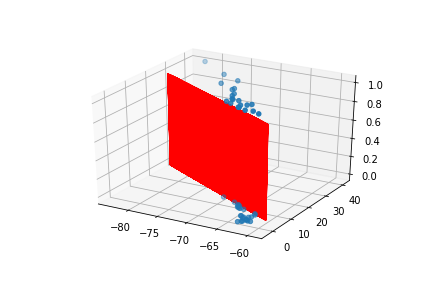

In [130]:
#Let's lower the dimension through linear dependence and find the points of the dividing plane
x1 = np.arange(min(X_valid['weight'].values), max(X_valid['weight'].values), 1)
x2 = np.arange(min(X_valid['height'].values), max(X_valid['height'].values), 1)
x3 = np.arange(min(X_valid['repwt'].values), max(X_valid['repwt'].values), 1)
x4 = np.arange(min(X_valid['repht'].values), max(X_valid['repht'].values), 1)

x_f = []
y_f = []
z_f = []
eps = 0.05
for x1_ in x1:
    for x2_ in x2:
        for x3_ in x3:
            for x4_ in x4:    
                a = dense[0] * x1_ + dense[1] * x2_ + dense[4]
                b =  dense[2] * x3_ + dense[3] * x4_ + dense[4]
                sol = a + b - dense[4]
                if(sol < eps) and (sol > -eps) :
                    x_f.append(a)
                    y_f.append(b)
                    z_f.append(0)
                    x_f.append(a)
                    y_f.append(b)
                    z_f.append(1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_valid['weight'].values * dense[0] + X_valid['height'].values * dense[1] + dense[4],
           X_valid['repwt'].values * dense[2] + X_valid['repht'].values * dense[3] + dense[4], y_predict)
ax.plot(x_f, y_f, z_f, color = 'red')

<IPython.core.display.Javascript object>


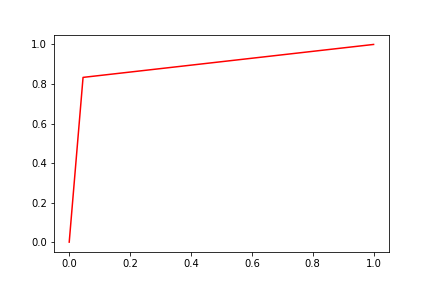

In [131]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_valid, y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

In [132]:
#Get precision and recall
from sklearn.metrics import recall_score
print("Recall: ", recall_score(y_valid.values, y_predict))
from sklearn.metrics import precision_score
print("Precision: ", precision_score(y_valid.values, y_predict))

Recall:  0.8333333333333334
Precision:  0.9523809523809523
